# Wrangle and Analyze data

# Table of Contents

* [Introduction](#introduction)
* [Data Wrangling](#data wrangling)
    * [Gathering](#gathering)
    * [Assessing](#assessing)
    * [Cleaning](#cleaning)
* [Storing](#storing)
* [Exploratory Data Analysis](#exploratory data analysis)   
* [Conclusion](#conclusion)
* [References](#references)




## Introduction

> Real-world data rarely comes clean. Using Python and its libraries, I was able to gather data from a variety of sources and in a variety of formats. I then assesed their quality and tidiness, then cleaned them. 

### Softwares needed:
> The following packages (libraries) needed to be installed. You can install these packages via conda or pip or using the import statements in jupyter notebook. 
* pandas
* NumPy
* requests
* tweepy
* json

> You can use a a text editor, like VS Code or Atom but I preferred to keep notes in jupyter.

> A terminal application (Terminal on Mac and Linux or Cygwin on Windows).

### Background

> I gathered three pieces of data and will go further into detail through this Jupyter Notebook titled `wrangle_act.ipynb`. The WeRateDogs Twitter archive was provided to as part of this project by Udacity. This was downloaded manually by clicking the following link: `twitter_archive_enhanced.csv`.

> The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. File(`image_predictions.tsv`) was also provided by Udacity and was downloaded from their servers programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

> I used the tweet IDs in the WeRateDogs Twitter archive to query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. 


> Ultimately my aim in undertaking this project was to wrangle this Twitter data in order to create interesting and trustworthy analyses and visualizations.This included making an extra effort in gathering more data in order to get the best analysis and visualizations.

### Let's get started!
> I started out by setting up the import statements for all of the packages I planned on using.

In [ ]:
# import library for data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import library for making HTTP requests
import requests
import json
# import os(operating system) library to store file
import os
from datetime import datetime


# 'magic word' so that your visualizations are plotted
%matplotlib inline


## Gathering the Data
Data was gathered from three data sources.
1. Download and load csv file data manually into DataFrame.
2. Download and load tweet image predictions programatically into DataFrame.
3. Webscraping data using API

###  Firstly, download and load csv file data manually into DataFrame.
> The WeRateDogs Twitter archive provided by Udacity. File `twitter_archive_enhanced.csv`downloaded manually and then loaded and opened into pandas DataFrame `arch_df`.

In [ ]:
# increase column width so that the whole text in the 'text' column is visible.
pd.set_option('display.max_colwidth', None)

In [ ]:
# load in the twitter archived data for WeRateDogs into dataframe
arch_df = pd.read_csv('twitter-archive-enhanced.csv')

### Secondly, download and load tweet image predictions programatically into DataFrame.
> File `image_predictions.tsv` is hosted on Udacity's servers and was downloaded programmatically using the `requests` library and the following URL:https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [87]:
# `requests` module allows you to send HTTP requests
import requests

# url of image prediction tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# send HTTP request to URL and save the response from server in a response object called r.
r = requests.get(url) 
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)

# Import data from the tsv file to a pandas DataFrame `img_df`.
img_df = pd.read_csv('image-predictions.tsv', sep = ('\t'))

### Thirdly, webscraping using Tweepy API
* Query Twitter API for each tweet's JSON data using the tweet IDs in the WeRateDogs Twitter archive.
* Query Twitter API for each tweet's "retweet count" and "favorite ("like") count" at minimum, and any additional data.
* Store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
* Each tweet's JSON data should be written to its own line.
* Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [ ]:
# used to download from twitter's API
import tweepy
from tweepy import OAuthHandler
import json

# https://github.com/tweepy/tweepy/blob/master/examples/oauth.py
# == OAuth Authentication ==
#
# This mode of authentication is the new preferred way
# of authenticating with Twitter.

# define keys
consumer_key = 'prDTAiUejLjznFcQfPnrsNRx8'
consumer_secret = 'E79WpXjaIAQLbbrRyoDu9i25NILjrDv54pe0x0yJDUXV7osphO'
access_token = '920063514063945728-5nqXAFHdlfnJhk5rrJrA4cclqelSThd'
access_secret = 'uyVQSHbdd5aJfwvkLbNJjBd70S84v3xlVuTvmMstBhKpD'

# `OAuthHandler` instance into which we pass `consumer_key` and `consumer_secret`
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# store strings values for `access_token` and `access_key` in order to store access token
auth.set_access_token(access_token, access_secret)

# Construct the API instance `api = tweepy.API(auth)` to pull the data from Twitter
# `wait_on_rate_limit_notify` parameter added to decide whether or not to print a notification
# when Tweepy is waiting for rate limits to replenish
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify = True)


In [ ]:
# If the authentication was successful, you should
# see the name of the account print out
print(api.me().name)

In [ ]:
# get tweet status
tweet = api.get_status(arch_df.tweet_id[7], tweet_mode='extended')

In [ ]:
# show tweet info
info = tweet._json
info

In [92]:
# create tweet_json.txt file if it is not already existing
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [93]:
# create list twitter ids
tweet_ids = arch_df.tweet_id.values

* Error handling in Python is done through the use of exceptions that are caught in try blocks and handled in except blocks.
* If an error is encountered, a try block code execution is stopped and transferred down to the except block.

In [94]:
import time

import datetime
# https://github.com/Pattingerr/data_wrangling_project/blob/master/wrangle_act.ipynb

# Tweets that can't be found are saved in this  list
tweets_not_found =[]

# get start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding='UTF-8') as file:
    # For loop which will add each available tweet json to list_of_tw
    for tweet_id in tweet_ids:
        # try block to test block of code for errors
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            
            # dumping all tweets fetched using API to tweet_json.txt
            json.dump( tweet._json, file)
            file.write('\n')
            print(tweet_id, "No error, writing to memory")
        # `except` block to handle the error
        except:
            print("Error in Tweet ID:", tweet_id, "Time:",  datetime.datetime.now().time())
            tweets_not_found.append(tweet_id)

# get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime
print("Runtime: ", end - start)
            
            
            

Start time: 14:23:23.269252
892420643555336193 No error, writing to memory
892177421306343426 No error, writing to memory
891815181378084864 No error, writing to memory
891689557279858688 No error, writing to memory
891327558926688256 No error, writing to memory
891087950875897856 No error, writing to memory
890971913173991426 No error, writing to memory
890729181411237888 No error, writing to memory
890609185150312448 No error, writing to memory
890240255349198849 No error, writing to memory
890006608113172480 No error, writing to memory
889880896479866881 No error, writing to memory
889665388333682689 No error, writing to memory
889638837579907072 No error, writing to memory
889531135344209921 No error, writing to memory
889278841981685760 No error, writing to memory
888917238123831296 No error, writing to memory
888804989199671297 No error, writing to memory
888554962724278272 No error, writing to memory
Error in Tweet ID: 888202515573088257 Time: 14:23:29.538990
888078434458587136 

858843525470990336 No error, writing to memory
858471635011153920 No error, writing to memory
858107933456039936 No error, writing to memory
857989990357356544 No error, writing to memory
857746408056729600 No error, writing to memory
857393404942143489 No error, writing to memory
857263160327368704 No error, writing to memory
857214891891077121 No error, writing to memory
857062103051644929 No error, writing to memory
857029823797047296 No error, writing to memory
Error in Tweet ID: 856602993587888130 Time: 14:24:21.874158
856543823941562368 No error, writing to memory
856526610513747968 No error, writing to memory
856330835276025856 No error, writing to memory
856288084350160898 No error, writing to memory
856282028240666624 No error, writing to memory
855862651834028034 No error, writing to memory
855860136149123072 No error, writing to memory
855857698524602368 No error, writing to memory
855851453814013952 No error, writing to memory
855818117272018944 No error, writing to memory


Rate limit reached. Sleeping for: 510


832088576586297345 No error, writing to memory
832040443403784192 No error, writing to memory
832032802820481025 No error, writing to memory
831939777352105988 No error, writing to memory
831926988323639298 No error, writing to memory
831911600680497154 No error, writing to memory
831670449226514432 No error, writing to memory
831650051525054464 No error, writing to memory
831552930092285952 No error, writing to memory
831322785565769729 No error, writing to memory
831315979191906304 No error, writing to memory
831309418084069378 No error, writing to memory
831262627380748289 No error, writing to memory
830956169170665475 No error, writing to memory
830583320585068544 No error, writing to memory
830173239259324417 No error, writing to memory
830097400375152640 No error, writing to memory
829878982036299777 No error, writing to memory
829861396166877184 No error, writing to memory
829501995190984704 No error, writing to memory
829449946868879360 No error, writing to memory
Error in Twee

810984652412424192 No error, writing to memory
810896069567610880 No error, writing to memory
810657578271330305 No error, writing to memory
810284430598270976 No error, writing to memory
810254108431155201 No error, writing to memory
809920764300447744 No error, writing to memory
809808892968534016 No error, writing to memory
809448704142938112 No error, writing to memory
809220051211603969 No error, writing to memory
809084759137812480 No error, writing to memory
808838249661788160 No error, writing to memory
808733504066486276 No error, writing to memory
808501579447930884 No error, writing to memory
808344865868283904 No error, writing to memory
808134635716833280 No error, writing to memory
808106460588765185 No error, writing to memory
808001312164028416 No error, writing to memory
807621403335917568 No error, writing to memory
807106840509214720 No error, writing to memory
807059379405148160 No error, writing to memory
807010152071229440 No error, writing to memory
8066290751252

787322443945877504 No error, writing to memory
787111942498508800 No error, writing to memory
786963064373534720 No error, writing to memory
786729988674449408 No error, writing to memory
786709082849828864 No error, writing to memory
786664955043049472 No error, writing to memory
786595970293370880 No error, writing to memory
786363235746385920 No error, writing to memory
786286427768250368 No error, writing to memory
786233965241827333 No error, writing to memory
786051337297522688 No error, writing to memory
786036967502913536 No error, writing to memory
785927819176054784 No error, writing to memory
785872687017132033 No error, writing to memory
785639753186217984 No error, writing to memory
785533386513321988 No error, writing to memory
785515384317313025 No error, writing to memory
785264754247995392 No error, writing to memory
785170936622350336 No error, writing to memory
784826020293709826 No error, writing to memory
784517518371221505 No error, writing to memory
7844314304116

762316489655476224 No error, writing to memory
762035686371364864 No error, writing to memory
761976711479193600 No error, writing to memory
761750502866649088 No error, writing to memory
761745352076779520 No error, writing to memory
761672994376806400 No error, writing to memory
761599872357261312 No error, writing to memory
761371037149827077 No error, writing to memory
761334018830917632 No error, writing to memory
761292947749015552 No error, writing to memory
761227390836215808 No error, writing to memory
761004547850530816 No error, writing to memory
760893934457552897 No error, writing to memory
760656994973933572 No error, writing to memory
760641137271070720 No error, writing to memory
760539183865880579 No error, writing to memory
760521673607086080 No error, writing to memory
760290219849637889 No error, writing to memory
760252756032651264 No error, writing to memory
760190180481531904 No error, writing to memory
760153949710192640 No error, writing to memory
7599430737492

744234799360020481 No error, writing to memory
744223424764059648 No error, writing to memory
743980027717509120 No error, writing to memory
743895849529389061 No error, writing to memory
743835915802583040 No error, writing to memory
743609206067040256 No error, writing to memory
743595368194129920 No error, writing to memory
743545585370791937 No error, writing to memory
743510151680958465 No error, writing to memory
743253157753532416 No error, writing to memory
743222593470234624 No error, writing to memory
743210557239623680 No error, writing to memory
742534281772302336 No error, writing to memory
742528092657332225 No error, writing to memory
742465774154047488 No error, writing to memory
742423170473463808 No error, writing to memory
742385895052087300 No error, writing to memory
742161199639494656 No error, writing to memory
742150209887731712 No error, writing to memory
741793263812808706 No error, writing to memory
741743634094141440 No error, writing to memory
7414382596670

715200624753819648 No error, writing to memory
715009755312439296 No error, writing to memory
714982300363173890 No error, writing to memory
714962719905021952 No error, writing to memory
714957620017307648 No error, writing to memory
714631576617938945 No error, writing to memory
714606013974974464 No error, writing to memory
714485234495041536 No error, writing to memory
714258258790387713 No error, writing to memory
714251586676113411 No error, writing to memory
714214115368108032 No error, writing to memory
714141408463036416 No error, writing to memory
713919462244790272 No error, writing to memory
713909862279876608 No error, writing to memory
713900603437621249 No error, writing to memory
713761197720473600 No error, writing to memory
713411074226274305 No error, writing to memory
713177543487135744 No error, writing to memory
713175907180089344 No error, writing to memory
712809025985978368 No error, writing to memory
712717840512598017 No error, writing to memory
7126686548533

Rate limit reached. Sleeping for: 620


711998809858043904 No error, writing to memory
711968124745228288 No error, writing to memory
711743778164514816 No error, writing to memory
711732680602345472 No error, writing to memory
711694788429553666 No error, writing to memory
711652651650457602 No error, writing to memory
711363825979756544 No error, writing to memory
711306686208872448 No error, writing to memory
711008018775851008 No error, writing to memory
710997087345876993 No error, writing to memory
710844581445812225 No error, writing to memory
710833117892898816 No error, writing to memory
710658690886586372 No error, writing to memory
710609963652087808 No error, writing to memory
710588934686908417 No error, writing to memory
710296729921429505 No error, writing to memory
710283270106132480 No error, writing to memory
710272297844797440 No error, writing to memory
710269109699739648 No error, writing to memory
710153181850935296 No error, writing to memory
710140971284037632 No error, writing to memory
7101170146569

698549713696649216 No error, writing to memory
698355670425473025 No error, writing to memory
698342080612007937 No error, writing to memory
698262614669991936 No error, writing to memory
698195409219559425 No error, writing to memory
698178924120031232 No error, writing to memory
697995514407682048 No error, writing to memory
697990423684476929 No error, writing to memory
697943111201378304 No error, writing to memory
697881462549430272 No error, writing to memory
697630435728322560 No error, writing to memory
697616773278015490 No error, writing to memory
697596423848730625 No error, writing to memory
697575480820686848 No error, writing to memory
697516214579523584 No error, writing to memory
697482927769255936 No error, writing to memory
697463031882764288 No error, writing to memory
697270446429966336 No error, writing to memory
697259378236399616 No error, writing to memory
697255105972801536 No error, writing to memory
697242256848379904 No error, writing to memory
6969002046966

686394059078897668 No error, writing to memory
686386521809772549 No error, writing to memory
686377065986265092 No error, writing to memory
686358356425093120 No error, writing to memory
686286779679375361 No error, writing to memory
686050296934563840 No error, writing to memory
686035780142297088 No error, writing to memory
686034024800862208 No error, writing to memory
686007916130873345 No error, writing to memory
686003207160610816 No error, writing to memory
685973236358713344 No error, writing to memory
685943807276412928 No error, writing to memory
685906723014619143 No error, writing to memory
685681090388975616 No error, writing to memory
685667379192414208 No error, writing to memory
685663452032069632 No error, writing to memory
685641971164143616 No error, writing to memory
685547936038666240 No error, writing to memory
685532292383666176 No error, writing to memory
685325112850124800 No error, writing to memory
685321586178670592 No error, writing to memory
6853152399031

678396796259975168 No error, writing to memory
678389028614488064 No error, writing to memory
678380236862578688 No error, writing to memory
678341075375947776 No error, writing to memory
678334497360859136 No error, writing to memory
678278586130948096 No error, writing to memory
678255464182861824 No error, writing to memory
678023323247357953 No error, writing to memory
678021115718029313 No error, writing to memory
677961670166224897 No error, writing to memory
677918531514703872 No error, writing to memory
677895101218201600 No error, writing to memory
677716515794329600 No error, writing to memory
677700003327029250 No error, writing to memory
677698403548192770 No error, writing to memory
677687604918272002 No error, writing to memory
677673981332312066 No error, writing to memory
677662372920729601 No error, writing to memory
677644091929329666 No error, writing to memory
677573743309385728 No error, writing to memory
677565715327688705 No error, writing to memory
6775575655894

673711475735838725 No error, writing to memory
673709992831262724 No error, writing to memory
673708611235921920 No error, writing to memory
673707060090052608 No error, writing to memory
673705679337693185 No error, writing to memory
673700254269775872 No error, writing to memory
673697980713705472 No error, writing to memory
673689733134946305 No error, writing to memory
673688752737402881 No error, writing to memory
673686845050527744 No error, writing to memory
673680198160809984 No error, writing to memory
673662677122719744 No error, writing to memory
673656262056419329 No error, writing to memory
673636718965334016 No error, writing to memory
673612854080196609 No error, writing to memory
673583129559498752 No error, writing to memory
673580926094458881 No error, writing to memory
673576835670777856 No error, writing to memory
673363615379013632 No error, writing to memory
673359818736984064 No error, writing to memory
673355879178194945 No error, writing to memory
6733521249992

670421925039075328 No error, writing to memory
670420569653809152 No error, writing to memory
670417414769758208 No error, writing to memory
670411370698022913 No error, writing to memory
670408998013820928 No error, writing to memory
670403879788544000 No error, writing to memory
670385711116361728 No error, writing to memory
670374371102445568 No error, writing to memory
670361874861563904 No error, writing to memory
670338931251150849 No error, writing to memory
670319130621435904 No error, writing to memory
670303360680108032 No error, writing to memory
670290420111441920 No error, writing to memory
670093938074779648 No error, writing to memory
670086499208155136 No error, writing to memory
670079681849372674 No error, writing to memory
670073503555706880 No error, writing to memory
670069087419133954 No error, writing to memory
670061506722140161 No error, writing to memory
670055038660800512 No error, writing to memory
670046952931721218 No error, writing to memory
6700402955983

Rate limit reached. Sleeping for: 601


669972011175813120 No error, writing to memory
669970042633789440 No error, writing to memory
669942763794931712 No error, writing to memory
669926384437997569 No error, writing to memory
669923323644657664 No error, writing to memory
669753178989142016 No error, writing to memory
669749430875258880 No error, writing to memory
669684865554620416 No error, writing to memory
669683899023405056 No error, writing to memory
669682095984410625 No error, writing to memory
669680153564442624 No error, writing to memory
669661792646373376 No error, writing to memory
669625907762618368 No error, writing to memory
669603084620980224 No error, writing to memory
669597912108789760 No error, writing to memory
669583744538451968 No error, writing to memory
669573570759163904 No error, writing to memory
669571471778410496 No error, writing to memory
669567591774625800 No error, writing to memory
669564461267722241 No error, writing to memory
669393256313184256 No error, writing to memory
6693757183049

666644823164719104 No error, writing to memory
666454714377183233 No error, writing to memory
666447344410484738 No error, writing to memory
666437273139982337 No error, writing to memory
666435652385423360 No error, writing to memory
666430724426358785 No error, writing to memory
666428276349472768 No error, writing to memory
666421158376562688 No error, writing to memory
666418789513326592 No error, writing to memory
666411507551481857 No error, writing to memory
666407126856765440 No error, writing to memory
666396247373291520 No error, writing to memory
666373753744588802 No error, writing to memory
666362758909284353 No error, writing to memory
666353288456101888 No error, writing to memory
666345417576210432 No error, writing to memory
666337882303524864 No error, writing to memory
666293911632134144 No error, writing to memory
666287406224695296 No error, writing to memory
666273097616637952 No error, writing to memory
666268910803644416 No error, writing to memory
6661041332886

In [95]:
# error id
tweets_not_found

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

* Each tweet's JSON data should be written to its own line.
* Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [96]:
# https://knowledge.udacity.com/questions/304779
# https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects
# read text file line by line to create dataframe from tweet_json.txt
df_tweets = []
# create dictionary
tweet_dict = {}
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})

In [97]:
# creat dataframe
df_api = pd.DataFrame(df_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [98]:
# print new dataframe
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7410,35144
1,892177421306343426,5515,30410
2,891815181378084864,3639,22860
3,891689557279858688,7589,38421
4,891327558926688256,8163,36674


In [99]:
# save dataframe
df_api.to_csv('tweets_df.csv')

Check jupyter files to confirm file is saved

# Assessing the Data

> Now that each piece of data has been gathered, it is time to asses, assess them visually and programmatically for quality and tidiness issues.

> ### Archived Twitter Data Table

In [100]:
# display twitter archived data
arch_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1941,673715861853720576,NaN,NaN,2015-12-07 04:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673715861853720576/photo/1,4,10,a,None,None,None,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr",12,10,Balto,None,None,None,None
700,786233965241827333,NaN,NaN,2016-10-12 15:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786233965241827333/photo/1,11,10,Mattie,None,None,None,None
1140,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cilantro. She's a Fellation Gadzooks. Eyes are super magical af. 12/10 could get lost in https://t.co/yJ26LNuyj5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727685679342333952/photo/1,12,10,Cilantro,None,None,None,None
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Baron. He's officially festive as h*ck. Thinks it's just a fancy scarf. 11/10 would pat head approvingly https://t.co/PjulYEXTvg,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/813081950185472002/photo/1,https://twitter.com/dog_rates/status/813081950185472002/photo/1",11,10,Baron,None,None,None,None
158,861005113778896900,NaN,NaN,2017-05-06 23:49:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Burt. He thinks your thesis statement is comically underdeveloped. 12/10 intellectual af https://t.co/jH6EN9cEn6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861005113778896900/photo/1,12,10,Burt,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156699303936/photo/1,9,10,Klevin,None,None,None,None
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He basks in the glory of rebellion. 9/10 probably a preteen https://t.co/kDamUfeIpm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489313951744/photo/1,9,10,Cooper,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
2245,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stu. Stu has stacks on stacks and an eye made of pure gold. 10/10 pay for

In [101]:
arch_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

> ### Tweet Image Prediction Table

In [102]:
# display image prediction table
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [103]:
img_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
* p1_conf is how confident the algorithm is in its #1 prediction → 95%
* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
* p2 is the algorithm's second most likely prediction → Labrador retriever
* p2_conf is how confident the algorithm is in its #2 prediction → 1%
* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE etc.

> ### Tweet Count Data Table

In [104]:
#display json txt file
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7410,35144
1,892177421306343426,5515,30410
2,891815181378084864,3639,22860
3,891689557279858688,7589,38421
4,891327558926688256,8163,36674


In [105]:
df_api.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

# Programatically Assess

> ### Archived Twitter Data Table

In [106]:
# return list that contain 20 items from a sequence
arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [107]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [108]:
# statistics
arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [109]:
# check duplicate id
arch_df['tweet_id'].duplicated().sum()

0

In [110]:
# Total up the number of NaN values in each row of the DataFrame.
arch_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [111]:
arch_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
            ... 
Bookstore      1
Jockson        1
Randall        1
Fynn           1
Duddles        1
Name: name, Length: 957, dtype: int64

In [112]:
arch_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [113]:
arch_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> ### Tweet Image Prediction Table

In [114]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [115]:
# return list that contain 20 items from a sequence
img_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/760289324994879489/pu/img/3ItvBEoo4aebPfvr.jpg,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African_crocodile,0.330625,False,American_alligator,0.075356,False,mink,0.057481,False
1092,719551379208073216,https://pbs.twimg.com/media/CfxcKU6W8AE-wEx.jpg,1,malamute,0.873233,True,Siberian_husky,0.076435,True,Eskimo_dog,0.035745,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
1050,713900603437621249,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True


In [116]:
# statistics
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [117]:
img_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
china_cabinet           1
espresso                1
mud_turtle              1
terrapin                1
maze                    1
Name: p1, Length: 378, dtype: int64

In [118]:
# Total up the number of NaN values in each row of the DataFrame.
img_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [119]:
img_df.duplicated().sum()

0

In [120]:
img_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

> ### Tweet Count Data Table

In [121]:
# print new dataframe
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7410,35144
1,892177421306343426,5515,30410
2,891815181378084864,3639,22860
3,891689557279858688,7589,38421
4,891327558926688256,8163,36674


In [122]:
# print new dataframe
df_api.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [123]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [124]:
# Total up the number of NaN values in each row of the DataFrame.
df_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [125]:
df_api.favorite_count.value_counts()

0        163
1031       5
229        4
1430       4
747        3
        ... 
25151      1
1562       1
6722       1
2932       1
34796      1
Name: favorite_count, Length: 1991, dtype: int64

In [126]:
df_api.retweet_count.value_counts()

438     5
2393    4
3331    4
503     4
51      4
       ..
1950    1
3282    1
5325    1
1223    1
2045    1
Name: retweet_count, Length: 1668, dtype: int64

In [127]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2604.501073,7337.978550
std,6.823170e+16,4405.974148,11396.589515
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,528.500000,1275.000000
50%,7.182469e+17,1216.000000,3185.000000
75%,7.986692e+17,3022.000000,8977.500000
max,8.924206e+17,74790.000000,151134.000000


***Quality***

1. Missing Values in **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp**, and **expanded_urls**
2. Drop unwanted columns: **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp, expanded_urls**

3. Replace 'None' values in name, **doggo, floofer, pupper, puppo columns** with np.nan (NaN)
4. Replace the empty strings with NaN and change datatype to category in the new combined column.
5. Extract the date and time from the **timestamp** column and put them into two new columns. 
6. Converting new column **time** to datetime since it remained an object after **timestamp** column split
7. Drop the **timestamp** column after that.

8. **tweet_id** is an integer-should be a string for twitter archive and image prediction tables.



***Tidiness**
1. From the dogtionary it is observed that column name **floofer** should be spelled **floof**
2. Combine columns values of **doggo,floofer,pupper,puppo** into a single column called **dog_stage**.
3. Drop columns **doggo,floofer,pupper,puppo** after combining into **dog_stage**

3. Make the **source** column readable by replacing the urls in it by the source name and change its datatype to category.
4. Combining **rating_numerator and rating_denominator** columns into a single ratings column
5. Drop **rating_numerator and rating_denominator** columns now that we have a single ratings column
6. In the img_df table, the dogbreeds in the p1, p2, and p3 are converting all the names to lowercase letters.
7. Converting all names to Uppercase to keep tidy in in p1, p2, and p3

7. The archive, images dataframe, and the info dataframe should all be one dataframe


# Cleaning
Twitter Archive

Making a copy of each piece of data using `.copy()`

In [220]:
# making copies of original dataframe for testing
arch_df_clean = arch_df.copy()
img_df_clean = img_df.copy()
df_api_clean = df_api.copy()

### Define
1. Query missing Values in **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp, **expanded_urls** 
2. Drop missing values

### Code

In [203]:
# https://hindamosh.github.io/data_wrangling/

# filter columns with condition equal to `NaN` using `.query`
arch_df_clean = arch_df_clean.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')

# drop unwanted columns
xcolumns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
arch_df_clean = arch_df_clean.drop(columns = xcolumns, axis=1)

### Test

In [221]:
# check for null values in the cleaned dataset
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define
According to dogtionary floofer should actually be floof.

### Code

In [222]:
# rename floofer to floof
arch_df_clean = arch_df_clean.rename(columns = {"floofer":"floof"}) 


### Test

In [223]:
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define

1. Replace 'None' values in name, **doggo, floof, pupper, puppo columns** with np.nan (NaN)
2. The columns values of **doggo,floofer,pupper,puppo** need to be combined into a single column called **dog_stage**.
3. Replace the empty strings with NaN and change datatype to category in the new combined column
4. Drop columns **doggo,floof,pupper,puppo**

### Code

In [224]:
# https://hindamosh.github.io/data_wrangling/
# select the dog stages columns from the dataset
all_dogs_type = ['doggo', 'floof', 'pupper', 'puppo']

# replace the 'None' string with np.nan 
arch_df_clean[all_dogs_type] = arch_df_clean[all_dogs_type].replace('None', np.nan)

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
arch_df_clean['dog_stage'] = arch_df_clean[all_dogs_type].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
arch_df_clean.dog_stage = arch_df_clean.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
arch_df_clean =arch_df_clean.drop(columns = all_dogs_type, axis =1)

In [236]:
# check for the values of the combined column 'dog_stage
arch_df_clean.dog_stage.value_counts()


pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Test

In [231]:
# check for the data columns and datatype
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  dog_stage         

In [237]:
# check for the values of the combined column 'dog_stage
arch_df_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define
Converting **timestamp** to `datetime` since it is currently an object

### Code

In [214]:
import datetime
# converting 'timestamp' to datetime
arch_df_clean.timestamp = pd.to_datetime(arch_df_clean.timestamp, yearfirst= True)


### Test

In [137]:
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 149.9+ KB


### Define 

1. Extract the date and time from the **timestamp** column and put them into two new columns.

2. Drop the **timestamp** column after that.

1. **timestamp** is an object- should be datetime

### Code

In [138]:
# using the apply function, applying the strftime function to each value of the timestamp column in each row
arch_df_clean['date'] = arch_df_clean['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
arch_df_clean['time'] = arch_df_clean['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

### Test

In [139]:
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    category           
 9   date                2097 non-null   object             
 10  time                2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 182.6+ KB


In [140]:
#changing datatype of the date column to datetime
arch_df_clean.date = pd.to_datetime(arch_df_clean.date, dayfirst = True)


In [141]:
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    category           
 9   date                2097 non-null   datetime64[ns]     
 10  time                2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(3), object(5)
memory usage: 18

### Code

In [142]:
# dropping the timestamp column
arch_df_clean = arch_df_clean.drop('timestamp', axis = 1)

### Test 

In [143]:
arch_df_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,2017-07-29,16:00:24


### Define
Convert **tweet_id** datatype from integer to string

### Code

In [144]:
# convert integer to string
arch_df_clean['tweet_id']= arch_df_clean['tweet_id'].astype(str)

### Test

In [145]:
# confirm datatype changed
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   source              2097 non-null   object        
 2   text                2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   name                2097 non-null   object        
 7   dog_stage           336 non-null    category      
 8   date                2097 non-null   datetime64[ns]
 9   time                2097 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 166.2+ KB


### Define
Make the **source** column readable by replacing the urls in it by the source name and change its datatype to category.


### Code

In [146]:
# https://github.com/Mitul2991/Udacity-Project---Wrangling-and-analyzing-data-from-twitter-archives/blob/master/wrangle_act.ipynb
#the source column has only 3 different values, thus assigning each value to a different variable  
a = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
b = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
c = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
d = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'


In [147]:
# using the variables created above in the replace function 
arch_df_clean.source = arch_df_clean.source.replace(a, 'Twitter for iPhone')
arch_df_clean.source = arch_df_clean.source.replace(b, 'Twitter Web Client')
arch_df_clean.source = arch_df_clean.source.replace(c, 'TweetDeck')
arch_df_clean.source = arch_df_clean.source.replace(d, 'Vine - Make a Scene')

### Test

In [148]:
# test by checking sample of cleaned dataset
arch_df_clean.sample(10)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time
819,770655142660169732,Twitter for iPhone,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11,10,very,NaN,2016-08-30,16:11:18
1102,735274964362878976,Twitter for iPhone,We only rate dogs. Please stop sending in your 31 year old sons that won't get out of your house. Thank you... 11/10 https://t.co/aTU53NNUkt,"https://twitter.com/dog_rates/status/735274964362878976/photo/1,https://twitter.com/dog_rates/status/735274964362878976/photo/1",11,10,None,NaN,2016-05-25,01:03:06
1163,723673163800948736,Twitter for iPhone,This is Ivar. She is a badass Viking warrior. Will sack your village. 10/10 savage af https://t.co/Dz6MiVssVU,https://twitter.com/dog_rates/status/723673163800948736/photo/1,10,10,Ivar,NaN,2016-04-23,00:41:42
1123,730427201120833536,Twitter for iPhone,This is Crystal. She's flawless. Really wants to be a frat bro. 11/10 who does she even know here? https://t.co/WyqNFvEulG,https://twitter.com/dog_rates/status/730427201120833536/photo/1,11,10,Crystal,NaN,2016-05-11,15:59:50
1668,682638830361513985,Twitter for iPhone,I have no words. Just a magnificent pup. 12/10 https://t.co/viwWHZgX8j,"https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1",12,10,None,NaN,2015-12-31,19:05:54
1762,678643457146150913,Twitter for iPhone,Meet Grizz. He just arrived. Couldn't wait until Christmas. Worried bc he saw the swastikas on the carpet. 10/10 https://t.co/QBGwYrT7rv,https://twitter.com/dog_rates/status/678643457146150913/photo/1,10,10,Grizz,NaN,2015-12-20,18:29:43
2216,668537837512433665,Twitter for iPhone,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,https://twitter.com/dog_rates/status/668537837512433665/photo/1,8,10,Spark,NaN,2015-11-22,21:13:35
1809,676864501615042560,Twitter for iPhone,Meet Ash. He's just a head now. Lost his body during the Third Crusade. Still in good spirits. 10/10 would pet well https://t.co/NJj2uP0atK,https://twitter.com/dog_rates/status/676864501615042560/photo/1,10,10,Ash,NaN,2015-12-15,20:40:47
1230,713411074226274305,Twitter for iPhone,Here we see an extremely rare Bearded Floofmallow. Only a few left in the wild. 11/10 would pet with a purpose https://t.co/jVJJKlPbvq,https://twitter.com/dog_rates/status/713411074226274305/photo/1,11,10,None,NaN,2016-03-25,17:03:49
1448,696405997980676096,Twitter for iPhone,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,https://twitter.com/dog_rates/status/696405997980676096/photo/1,7,10,Berb,NaN,2016-02-07,18:51:43


In [149]:
arch_df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
Combining **rating_numerator and rating_denominator** columns into a single ratings column

### Code

In [150]:
# divide the rating_numerator / rating_denominator and then mulitiply by 10 & make dog_ratings column
arch_df_clean['dog_ratings'] = 10 * arch_df_clean.rating_numerator / arch_df_clean.rating_denominator

### Test

In [151]:
# check for values in the dog_score column
arch_df_clean.dog_ratings.value_counts()

12.000000      490
10.000000      438
11.000000      418
13.000000      287
9.000000       153
8.000000        98
7.000000        51
14.000000       38
5.000000        35
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
1776.000000      1
34.285714        1
27.000000        1
420.000000       1
0.000000         1
26.000000        1
6.363636         1
8.181818         1
75.000000        1
Name: dog_ratings, dtype: int64

### Define
Drop **rating_numerator and rating_denominator** columns now that we have a single ratings column

### Code

In [152]:
# drop the columns rating_numerator & rating_denominator column
arch_df_clean.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

### Test

In [153]:
arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2097 non-null   object        
 1   source         2097 non-null   object        
 2   text           2097 non-null   object        
 3   expanded_urls  2094 non-null   object        
 4   name           2097 non-null   object        
 5   dog_stage      336 non-null    category      
 6   date           2097 non-null   datetime64[ns]
 7   time           2097 non-null   object        
 8   dog_ratings    2097 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 149.9+ KB


### Define
In the img_df table, remove underscore and replace with spaces for the dogbreeds in the p1, p2, and p3.

### Code

In [154]:
#replacing using the replace function
img_df_clean.p1 = img_df_clean.p1.str.replace('_',' ')
img_df_clean.p2 = img_df_clean.p2.str.replace('_',' ')
img_df_clean.p3 = img_df_clean.p3.str.replace('_',' ')

### Test

In [155]:
img_df_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Define
Converting all names to Uppercase to keep tidy in in p1, p2, and p3

### Code

In [156]:
img_df_clean['p1'] = img_df_clean['p1'].str.title()
img_df_clean['p2'] = img_df_clean['p2'].str.title()
img_df_clean['p3'] = img_df_clean['p3'].str.title()

### Test

In [157]:
img_df_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Define
Convert tweet id datatype in image prediction to string

### Code

In [158]:
# convert integer to string
img_df_clean['tweet_id']= img_df_clean['tweet_id'].astype(str)


### Test

In [159]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [160]:
# convert integer to string
df_api_clean['tweet_id']= img_df_clean['tweet_id'].astype(str)

df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2075 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Define
left join to combine all tweet ids into one table

### Code

In [161]:
# merge by id with image 
#df_final = img_df_clean.merge(arch_df_clean, left_on='tweet_id',right_on='tweet_id',how='inner')
#df_final = df_final.merge(df_api_clean,left_on='tweet_id',right_on='tweet_id',how='inner')

#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(arch_df_clean, 
                      img_df_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()






<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       1971 non-null   object        
 1   source         1971 non-null   object        
 2   text           1971 non-null   object        
 3   expanded_urls  1971 non-null   object        
 4   name           1971 non-null   object        
 5   dog_stage      303 non-null    category      
 6   date           1971 non-null   datetime64[ns]
 7   time           1971 non-null   object        
 8   dog_ratings    1971 non-null   float64       
 9   jpg_url        1971 non-null   object        
 10  img_num        1971 non-null   float64       
 11  p1             1971 non-null   object        
 12  p1_conf        1971 non-null   float64       
 13  p1_dog         1971 non-null   object        
 14  p2             1971 non-null   object        
 15  p2_conf        1971 n

### Test

In [168]:
df_twitter1.head()

,tweet_id,source,text,expanded_urls,name,dog_stage,date,time,dog_ratings,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,2017-08-01,16:23:56,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,2017-08-01,00:17:27,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,2017-07-31,00:18:03,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,2017-07-30,15:58:51,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,2017-07-29,16:00:24,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [169]:

#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, df_api_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   source          1971 non-null   object        
 2   text            1971 non-null   object        
 3   expanded_urls   1971 non-null   object        
 4   name            1971 non-null   object        
 5   dog_stage       303 non-null    category      
 6   date            1971 non-null   datetime64[ns]
 7   time            1971 non-null   object        
 8   dog_ratings     1971 non-null   float64       
 9   jpg_url         1971 non-null   object        
 10  img_num         1971 non-null   float64       
 11  p1              1971 non-null   object        
 12  p1_conf         1971 non-null   float64       
 13  p1_dog          1971 non-null   object        
 14  p2              1971 non-null   object        
 15  p2_c

In [170]:
df_twitter.head()

,tweet_id,source,text,expanded_urls,name,dog_stage,date,time,dog_ratings,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,2017-08-01,16:23:56,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,444,1109
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,2017-08-01,00:17:27,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,328,778
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,2017-07-31,00:18:03,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,471,896
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,2017-07-30,15:58:51,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,97,406
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,2017-07-29,16:00:24,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,388,1011


### Storing

In [172]:
# final cleaned dataset for each table
arch_df_clean.to_csv('twitter_archive_clean.csv', index = False)
img_df_clean.to_csv('img_df_clean.csv', index = False)
df_api_clean.to_csv('df_tweets_clean.csv', index = False)

In [173]:
# final dataset for combined cleaned table
df_twitter.to_csv('twitter_archive_master.csv',index=False)

# Analyzing

In [241]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1971 non-null   object        
 1   source          1971 non-null   object        
 2   text            1971 non-null   object        
 3   expanded_urls   1971 non-null   object        
 4   name            1971 non-null   object        
 5   dog_stage       303 non-null    category      
 6   date            1971 non-null   datetime64[ns]
 7   time            1971 non-null   object        
 8   dog_ratings     1971 non-null   float64       
 9   jpg_url         1971 non-null   object        
 10  img_num         1971 non-null   float64       
 11  p1              1971 non-null   object        
 12  p1_conf         1971 non-null   float64       
 13  p1_dog          1971 non-null   object        
 14  p2              1971 non-null   object        
 15  p2_c

In [243]:
df_twitter.describe()

,dog_ratings,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,11.694993,1.201928,0.594558,1.345850e-01,6.016556e-02,2910.564181,8273.744800
std,40.906341,0.559020,0.272126,1.010527e-01,5.094156e-02,4614.769866,11943.783892
min,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,0.000000
25%,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,702.500000,1867.000000
50%,11.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1540.000000,3925.000000
75%,12.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3331.000000,10381.500000
max,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,74790.000000,151134.000000


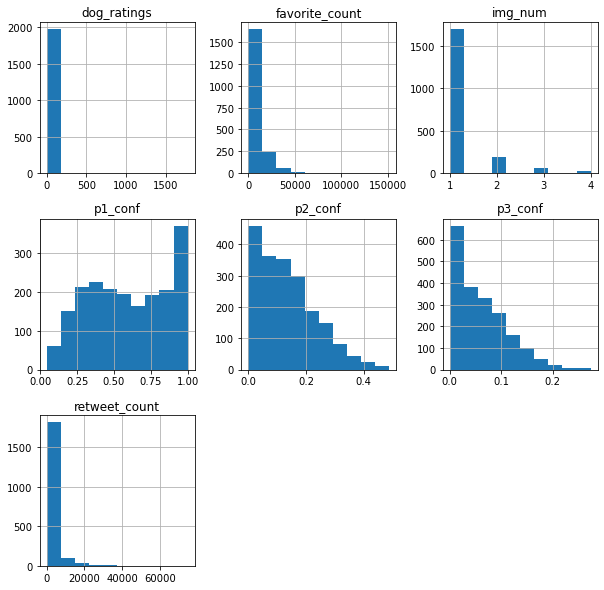

In [175]:
#calling the pandas `hist`() method returns histograms for all columns in the series.
df_twitter.hist(figsize=(10,10));

### What are the Top 10 dog breeds that are predicted using the image in the tweet?

In [176]:
# p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
# p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

# dog prediction
breeds_predicted = df_twitter[df_twitter.p1_dog == True]
breeds_not_predicted = df_twitter[df_twitter.p1_dog == False]


In [177]:
# list top 10 breeds predicted
breeds_predicted.p1.value_counts().head(10)

Golden Retriever      137
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               29
Name: p1, dtype: int64

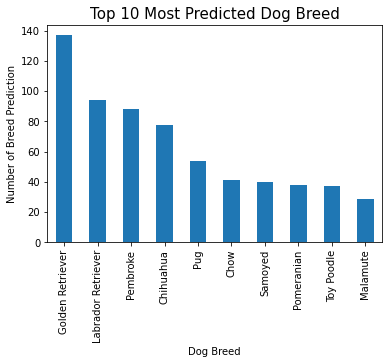

In [178]:
df_twitter['p1'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 Most Predicted Dog Breed', size=15)
plt.xlabel('Dog Breed')
plt.savefig('most_frequent_breed');

**Insight**: Golden Retriever is the top dog breed as predicted by the image tweet

### Frequency of each dog stage in the dataset

In [283]:
dog_counts = df_twitter.groupby('dog_stage')['tweet_id'].count()
dog_counts

dog_stage
doggo              63
doggo, floofer      1
doggo, pupper       8
doggo, puppo        1
floofer             7
pupper            201
puppo              22
Name: tweet_id, dtype: int64

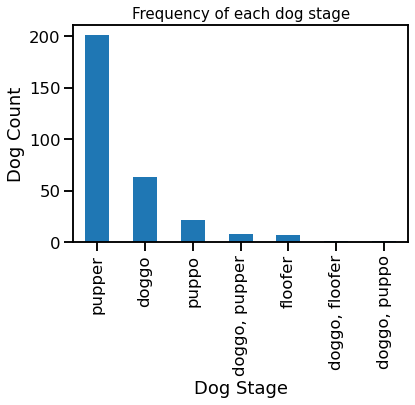

In [285]:
df_twitter['dog_stage'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Dog Count')
plt.title('Frequency of each dog stage', size=15)
plt.xlabel('Dog Stage')
plt.savefig('most_frequent_stage');

**Insight**: Pupper stage is most representede at 201 for the number of times a dog is in that stage in the dataset.

**Insight**: The most predicted dog breed is the Golden Retriever and rounding out the top 10 is the Malamute,

Text(0.5, 1.0, 'Distribution of favorite_count')

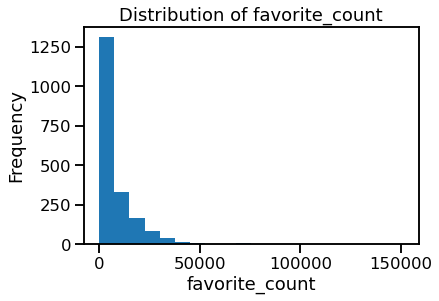

In [248]:
# plot histogram for favorite count
plt.hist(x = df_twitter.favorite_count, bins = 20)
plt.xlabel('favorite_count')
plt.ylabel('Frequency')
plt.title('Distribution of favorite_count')

### List the Top 10 dog breeds that have the highest ratings and their favorite count and retweet count

In [298]:
mean_rating = breeds_predicted.groupby('p1')['favorite_count', 'retweet_count', 'dog_ratings'].mean()
mean_rating.sort_values(by = 'dog_ratings', ascending = False).head(10)


<ipython-input-298-bc4c2455464b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_rating = breeds_predicted.groupby('p1')['favorite_count', 'retweet_count', 'dog_ratings'].mean()


,favorite_count,retweet_count,dog_ratings
p1,,,
Clumber,2135.000000,477.000000,27.000000
Pomeranian,7791.500000,3534.736842,12.868421
Saluki,3443.750000,1718.750000,12.500000
Briard,5254.666667,1584.333333,12.333333
Tibetan Mastiff,5657.000000,1742.250000,12.250000
Border Terrier,5924.428571,2104.571429,12.142857
Standard Schnauzer,7182.000000,1380.000000,12.000000
Kuvasz,6387.133333,2254.666667,12.000000
Silky Terrier,1548.000000,567.000000,12.000000


In [249]:
# predicting top 10 dogs with highest retweet
breeds_predicted.groupby('p1')['retweet_count'].mean().sort_values(ascending = False).head(10)

p1
Collie                    7494.800000
Lhasa                     6506.400000
Curly-Coated Retriever    6495.333333
Walker Hound              6424.400000
Norwich Terrier           6230.250000
Basenji                   5780.285714
Maltese Dog               5730.333333
Welsh Springer Spaniel    5493.000000
Malinois                  5446.888889
Pekinese                  5387.307692
Name: retweet_count, dtype: float64

### Determining the highest ratings

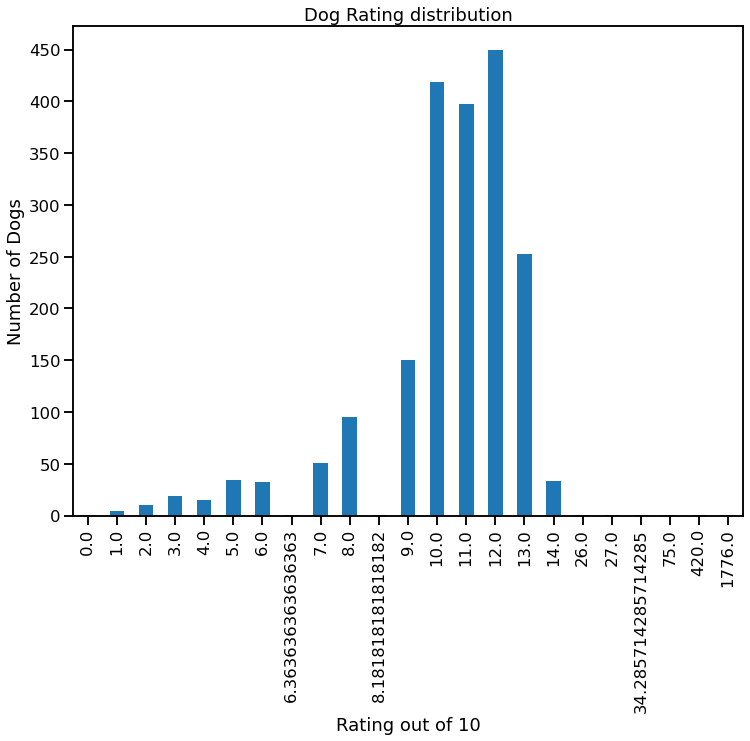

In [316]:
ax = df_twitter.dog_ratings.value_counts().sort_index().plot(kind = 'bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

**Insight**: Bar graph displaying the ratings for dogs in our dataset. We see there are over 400 dogs with a rating of 12 out of 10. There are not a lot dogs that have ratings between 1 to 5 out of 10

### How many tweets are there over time?

In [260]:
# tweets each month
df_twitter['date'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    295
2015-12    360
2016-01    166
2016-02    108
2016-03    118
2016-04     54
2016-05     56
2016-06     79
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     52
2016-12     54
2017-01     66
2017-02     64
2017-03     47
2017-04     40
2017-05     42
2017-06     44
2017-07     49
2017-08      2
Name: date, dtype: int64

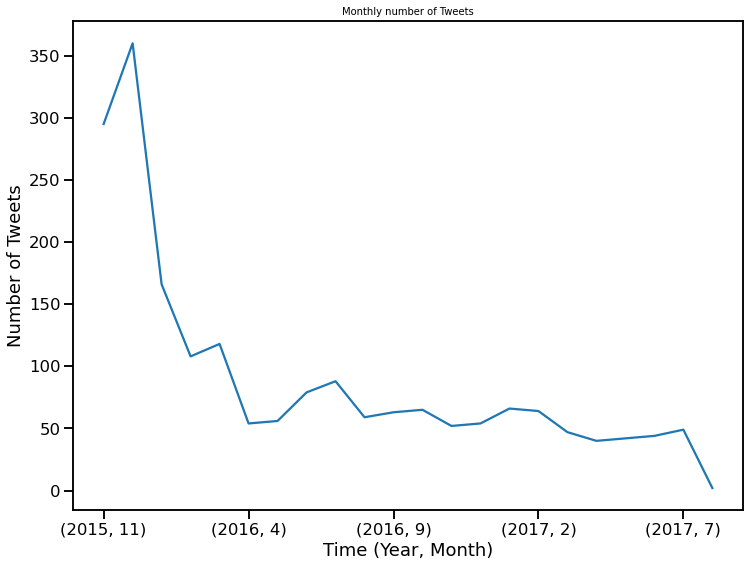

In [295]:
tweet_frequency = df_twitter['tweet_id'].groupby([df_twitter['date'].dt.year, df_twitter['date'].dt.month]).count()
tweet_frequency.plot(kind ='line')
plt.title('Monthly number of Tweets', size=10)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time')
plt.rcParams["figure.figsize"] = [12, 9]


**Insight**: The highest number of tweets were concentrated from November 2015 to March 2016, after which there was a significant drop intweets.

Strong correlation between favorite count and retweet count.

### What is most used source to tweet?

In [254]:
df_twitter['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

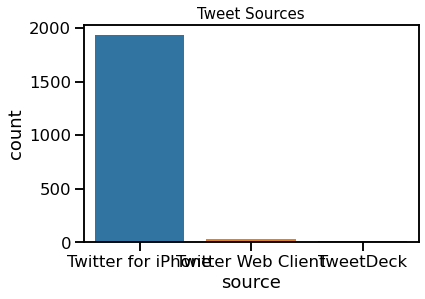

In [255]:
import seaborn as sns
sns.countplot(data=df_twitter, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

**Insight**: As expected a significant amount of tweets are sent from the iphone because of the ease of use on the iphone or the twitter app itself.

# References

https://github.com/rebeccaebarnes/DAND-Project-7/blob/master/wrangle_act.ipynb

https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb


https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/

https://knowledge.udacity.com/questions/304779

https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects

https://github.com/tweepy/tweepy/blob/master/examples/oauth.py

http://docs.tweepy.org/en/latest/getting_started.html

https://stackoverflow.com/questions/21308762/avoid-twitter-api-limitation-with-tweepy

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

https://www.pythonforbeginners.com/error-handling/python-try-and-except

https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

http://docs.tweepy.org/en/v3.5.0/getting_started.html#introduction

https://medium.com/ub-women-data-scholars/let-the-robot-do-your-work-web-scraping-with-python-9c147fb7690f